In [16]:
import pandas as pd
import numpy as np


In [17]:
train = pd.read_csv('./data/dftrain.csv')
test = pd.read_csv('./data/dftest.csv')
extra = pd.read_csv('./data/bank-full.csv', delimiter=';')
print(train.head())


   id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1  


In [18]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


CORRELATION WITH TARGET
y           1.000000
duration    0.519283
balance     0.122513
previous    0.119552
pdays       0.089277
age         0.009523
id          0.000615
day        -0.049625
campaign   -0.075829
Name: y, dtype: float64


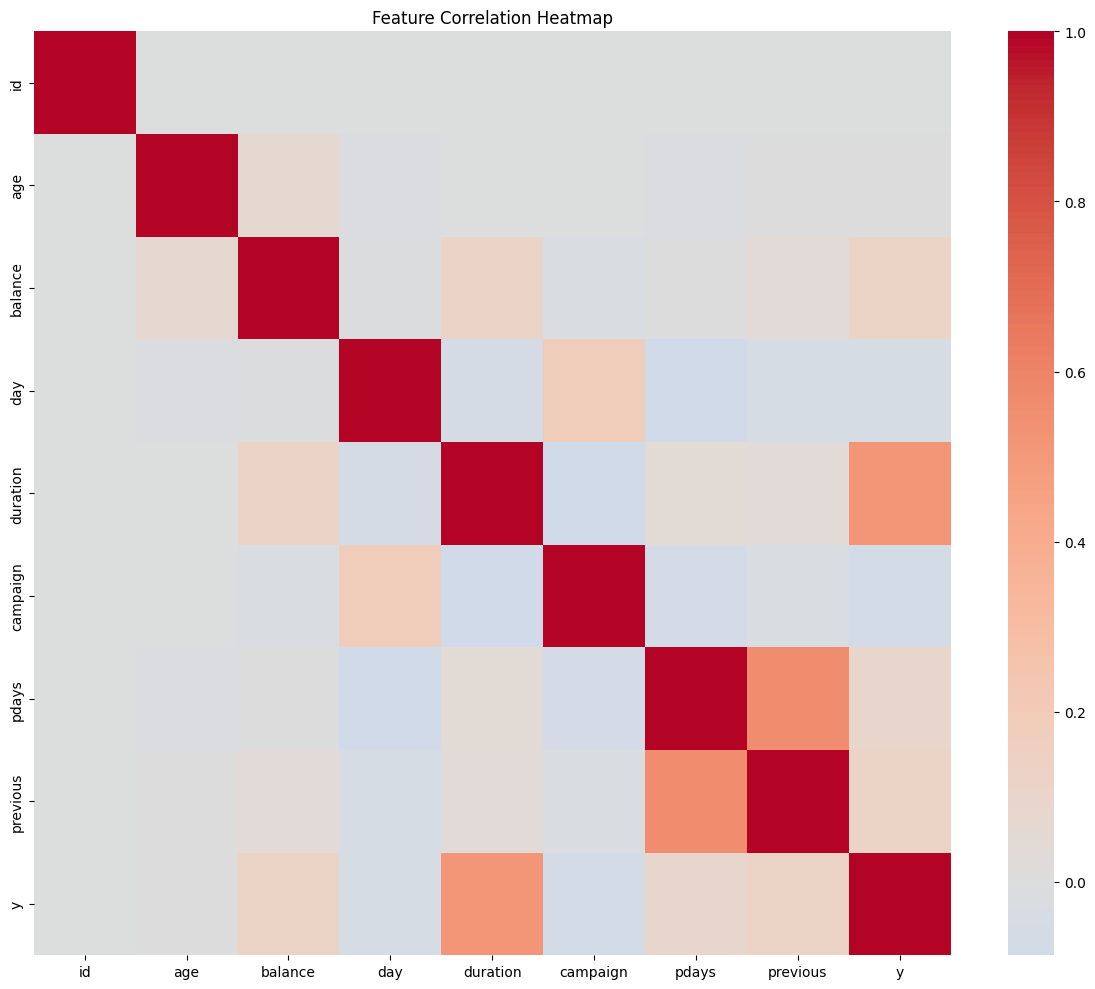

In [20]:
# EDA - Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for correlation
num_features = train.select_dtypes(include=[np.number]).columns.tolist()

print("=" * 60)
print("CORRELATION WITH TARGET")
print("=" * 60)
correlations = train[num_features].corr()['y'].sort_values(ascending=False)
print(correlations)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train[num_features].corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


In [21]:
# EDA - Categorical Features
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print("=" * 60)
print("CATEGORICAL FEATURES")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(train[col].value_counts().head(10))
    print(f"Unique values: {train[col].nunique()}")


CATEGORICAL FEATURES

JOB:
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
Name: count, dtype: int64
Unique values: 12

MARITAL:
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
Unique values: 3

EDUCATION:
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
Unique values: 4

DEFAULT:
default
no     737151
yes     12849
Name: count, dtype: int64
Unique values: 2

HOUSING:
housing
yes    411288
no     338712
Name: count, dtype: int64
Unique values: 2

LOAN:
loan
no     645023
yes    104977
Name: count, dtype: int64
Unique values: 2

CONTACT:
contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64
Unique values: 3

MONTH:
month
may    228411
aug    12885

NUMERICAL FEATURES STATISTICS
                  id            age        balance            day  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      40.926395    1204.067397      16.117209   
std    216506.495284      10.098829    2836.096759       8.250832   
min         0.000000      18.000000   -8019.000000       1.000000   
25%    187499.750000      33.000000       0.000000       9.000000   
50%    374999.500000      39.000000     634.000000      17.000000   
75%    562499.250000      48.000000    1390.000000      21.000000   
max    749999.000000      95.000000   99717.000000      31.000000   

            duration       campaign          pdays       previous  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean      256.229144       2.577008      22.412733       0.298545  
std       272.555662       2.718514      77.319998       1.335926  
min         1.000000       1.000000      -1.000000       0.000000  
25%     

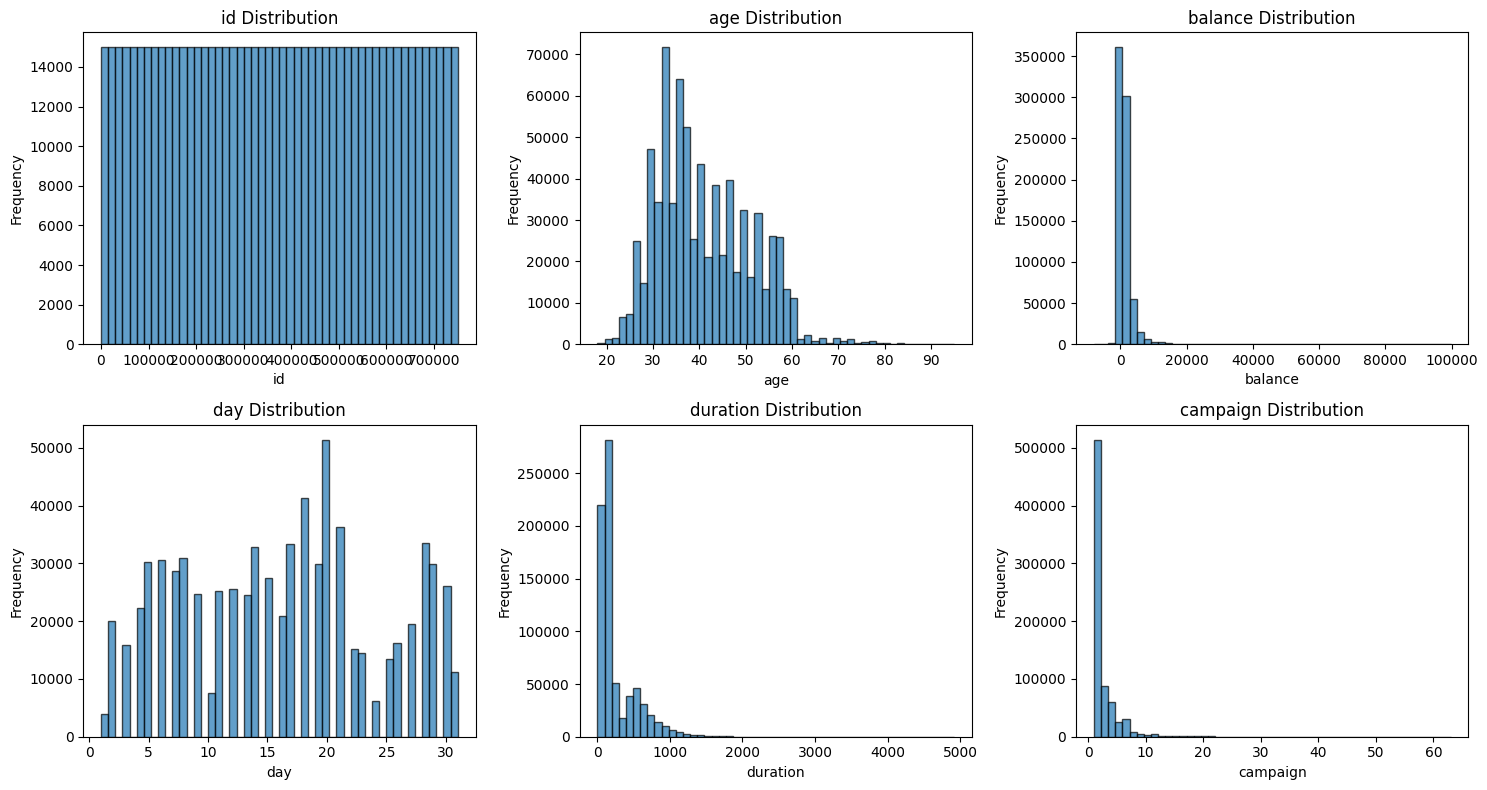

In [22]:
# EDA - Numerical Features Distribution
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
if 'y' in numerical_cols:
    numerical_cols.remove('y')

print("=" * 60)
print("NUMERICAL FEATURES STATISTICS")
print("=" * 60)
print(train[numerical_cols].describe())

# Plot distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:6]):
    axes[idx].hist(train[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [23]:
# EDA - Dataset Overview
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nTrain shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Extra shape: {extra.shape}")

print("\n" + "=" * 60)
print("TARGET DISTRIBUTION")
print("=" * 60)
print(train['y'].value_counts())
print(f"\nTarget balance: {train['y'].value_counts(normalize=True).to_dict()}")


DATASET OVERVIEW

Train shape: (750000, 18)
Test shape: (250000, 17)
Extra shape: (45211, 17)

TARGET DISTRIBUTION
y
0    659512
1     90488
Name: count, dtype: int64

Target balance: {0: 0.8793493333333333, 1: 0.12065066666666667}


In [24]:
# Feature engineering with trigonometric features
train['_duration_sin'] = np.sin(2*np.pi * train['duration'] / 540).astype('float32')
train['_duration_cos'] = np.cos(2*np.pi * train['duration'] / 540).astype('float32')
train['_balance_log'] = (np.sign(train['balance']) * np.log1p(np.abs(train['balance']))).astype('float32')
train['_balance_sin'] = np.sin(2*np.pi * train['balance'] / 1000).astype('float32')
train['_balance_cos'] = np.cos(2*np.pi * train['balance'] / 1000).astype('float32')
train['_age_sin'] = np.sin(2*np.pi * train['age'] / 10).astype('float32')
train['_pdays_sin'] = np.sin(2*np.pi * train['pdays'] / 7).astype('float32')

test['_duration_sin'] = np.sin(2*np.pi * test['duration'] / 540).astype('float32')
test['_duration_cos'] = np.cos(2*np.pi * test['duration'] / 540).astype('float32')
test['_balance_log'] = (np.sign(test['balance']) * np.log1p(np.abs(test['balance']))).astype('float32')
test['_balance_sin'] = np.sin(2*np.pi * test['balance'] / 1000).astype('float32')
test['_balance_cos'] = np.cos(2*np.pi * test['balance'] / 1000).astype('float32')
test['_age_sin'] = np.sin(2*np.pi * test['age'] / 10).astype('float32')
test['_pdays_sin'] = np.sin(2*np.pi * test['pdays'] / 7).astype('float32')

# Convert target - only if not already converted
if train['y'].dtype == 'object':
    train['y'] = (train['y'] == 'yes').astype('int32')
    print(f"Target converted from string to numeric")
else:
    print(f"Target already numeric, skipping conversion")

print(f"Target distribution: {train['y'].value_counts().to_dict()}")
print(f"Features created: {[c for c in train.columns if c.startswith('_')]}")


Target already numeric, skipping conversion
Target distribution: {0: 659512, 1: 90488}
Features created: ['_duration_sin', '_duration_cos', '_balance_log', '_balance_sin', '_balance_cos', '_age_sin', '_pdays_sin']


In [25]:
# Prepare features - select only numerical and categorical columns
%pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Identify columns
CATS = []
NUMS = []
for c in train.columns:
    if c == 'y':
        continue
    if train[c].dtype == 'object':
        CATS.append(c)
    else:
        NUMS.append(c)

print(f"Categorical: {CATS}")
print(f"Numerical: {NUMS}")

# Encode categorical features
for c in CATS:
    le = LabelEncoder()
    train[c] = le.fit_transform(train[c].astype(str))
    test[c] = le.transform(test[c].astype(str))

X_train = train[CATS + NUMS]
y_train = train['y']
X_test = test[CATS + NUMS]

print(f"\nTraining shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")



╭──────────────────────────────────────────────────────────╮
│                                                          │
│  "As long as I’m alive, there are infinite chances.     │
│   You can’t give up. That’s what it means to be a pirate!"│
│                                                          │
│                     — Monkey D. Luffy                    │
╰──────────────────────────────────────────────────────────╯


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical: ['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', '_duration_sin', '_duration_cos', '_balance_log', '_balance_sin', '_balance_cos', '_age_sin', '_pdays_sin']

Training shape: (750000, 24)
Test shape: (250000, 24)


In [26]:
# XGBoost Training with Out-of-Fold (OOF) Predictions
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Check target distribution
print(f"y_train unique values: {y_train.unique()}")
print(f"y_train value counts:\n{y_train.value_counts()}")
print(f"y_train dtype: {y_train.dtype}")

# Initialize OOF arrays
oof_preds = np.zeros(len(X_train))
test_preds = np.zeros(len(X_test))
fold_scores = []

# 5-Fold Cross-Validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

print("\nTraining XGBoost with 5-Fold CV...")
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr = X_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx]
    y_tr = y_train.iloc[train_idx].values
    y_val = y_train.iloc[val_idx].values
    
    # Check fold distributions
    print(f"\nFold {fold+1} - Train: {np.bincount(y_tr)}, Val: {np.bincount(y_val)}")
    
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss',
        early_stopping_rounds=10,
        base_score=0.5,
        verbosity=0
    )
    
    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    # OOF predictions
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = y_pred_proba
    
    # Debug: Check prediction range
    print(f"Predictions - min: {y_pred_proba.min():.6f}, max: {y_pred_proba.max():.6f}, mean: {y_pred_proba.mean():.6f}")
    
    # Test predictions
    test_preds += model.predict_proba(X_test)[:, 1] / n_folds
    
    # Fold score
    try:
        fold_score = roc_auc_score(y_val, oof_preds[val_idx])
        fold_scores.append(fold_score)
        print(f"Fold {fold+1}/{n_folds} - AUC: {fold_score:.6f}")
    except Exception as e:
        print(f"Fold {fold+1}/{n_folds} - AUC calculation failed: {e}")
        fold_scores.append(0)

# Overall OOF score
oof_score = roc_auc_score(y_train, oof_preds)
print(f"\nOverall OOF AUC: {oof_score:.6f}")
print(f"Mean Fold AUC: {np.mean(fold_scores):.6f} (+/- {np.std(fold_scores):.6f})")


y_train unique values: [0 1]
y_train value counts:
y
0    659512
1     90488
Name: count, dtype: int64
y_train dtype: int64

Training XGBoost with 5-Fold CV...

Fold 1 - Train: [527717  72283], Val: [131795  18205]
Predictions - min: 0.000345, max: 0.992928, mean: 0.120743
Fold 1/5 - AUC: 0.960989

Fold 2 - Train: [527556  72444], Val: [131956  18044]
Predictions - min: 0.000371, max: 0.995473, mean: 0.119637
Fold 2/5 - AUC: 0.960425

Fold 3 - Train: [527651  72349], Val: [131861  18139]
Predictions - min: 0.000324, max: 0.994340, mean: 0.121321
Fold 3/5 - AUC: 0.960751

Fold 4 - Train: [527630  72370], Val: [131882  18118]
Predictions - min: 0.000276, max: 0.991433, mean: 0.120854
Fold 4/5 - AUC: 0.962194

Fold 5 - Train: [527494  72506], Val: [132018  17982]
Predictions - min: 0.000389, max: 0.993076, mean: 0.120616
Fold 5/5 - AUC: 0.961787

Overall OOF AUC: 0.961223
Mean Fold AUC: 0.961229 (+/- 0.000660)


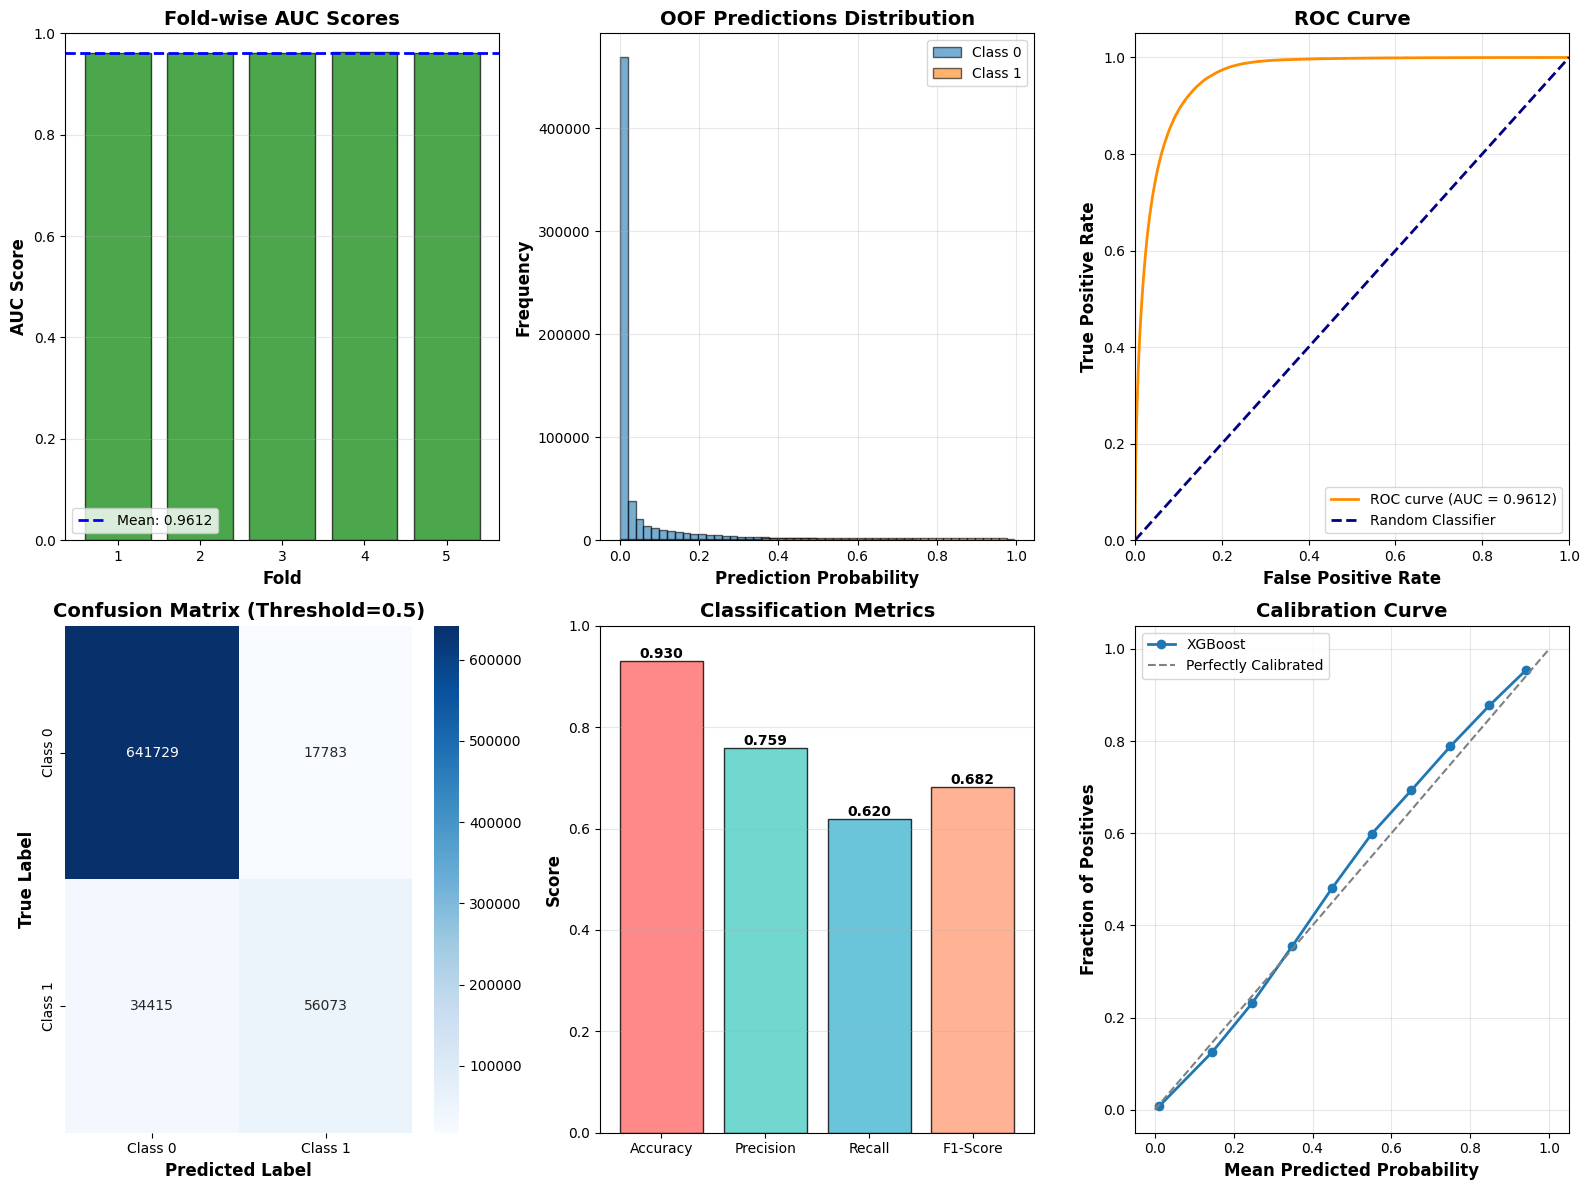


MODEL PERFORMANCE SUMMARY
Overall OOF AUC: 0.961223
ROC AUC: 0.961223
Accuracy: 0.930403
Precision: 0.759221
Recall: 0.619673
F1-Score: 0.682386
Mean Fold AUC: 0.961229 (+/- 0.000660)


In [27]:
# Visualization - Model Performance and Feature Importance

from sklearn.metrics import confusion_matrix, roc_curve, auc

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 1. Fold Scores Bar Chart
ax1 = plt.subplot(2, 3, 1)
fold_nums = list(range(1, len(fold_scores) + 1))
colors = ['green' if score > 0.5 else 'red' for score in fold_scores]
ax1.bar(fold_nums, fold_scores, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=np.mean(fold_scores), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(fold_scores):.4f}')
ax1.set_xlabel('Fold', fontsize=12, fontweight='bold')
ax1.set_ylabel('AUC Score', fontsize=12, fontweight='bold')
ax1.set_title('Fold-wise AUC Scores', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. OOF Predictions Distribution
ax2 = plt.subplot(2, 3, 2)
ax2.hist(oof_preds[y_train == 0], bins=50, alpha=0.6, label='Class 0', edgecolor='black')
ax2.hist(oof_preds[y_train == 1], bins=50, alpha=0.6, label='Class 1', edgecolor='black')
ax2.set_xlabel('Prediction Probability', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('OOF Predictions Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. ROC Curve
ax3 = plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_train, oof_preds)
roc_auc = auc(fpr, tpr)
ax3.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax3.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax3.legend(loc="lower right")
ax3.grid(alpha=0.3)

# 4. Confusion Matrix
ax4 = plt.subplot(2, 3, 4)
y_pred_binary = (oof_preds > 0.5).astype(int)
cm = confusion_matrix(y_train, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar=True,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
ax4.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax4.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax4.set_title('Confusion Matrix (Threshold=0.5)', fontsize=14, fontweight='bold')

# 5. Model Performance Metrics
ax5 = plt.subplot(2, 3, 5)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_train, y_pred_binary)
prec = precision_score(y_train, y_pred_binary, zero_division=0)
rec = recall_score(y_train, y_pred_binary, zero_division=0)
f1 = f1_score(y_train, y_pred_binary, zero_division=0)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [acc, prec, rec, f1]
colors_metrics = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
bars = ax5.bar(metrics, scores, color=colors_metrics, alpha=0.8, edgecolor='black')
ax5.set_ylim([0, 1])
ax5.set_ylabel('Score', fontsize=12, fontweight='bold')
ax5.set_title('Classification Metrics', fontsize=14, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Calibration Curve
ax6 = plt.subplot(2, 3, 6)
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_train, oof_preds, n_bins=10)
ax6.plot(prob_pred, prob_true, marker='o', linewidth=2, label='XGBoost')
ax6.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
ax6.set_xlabel('Mean Predicted Probability', fontsize=12, fontweight='bold')
ax6.set_ylabel('Fraction of Positives', fontsize=12, fontweight='bold')
ax6.set_title('Calibration Curve', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Overall OOF AUC: {oof_score:.6f}")
print(f"ROC AUC: {roc_auc:.6f}")
print(f"Accuracy: {acc:.6f}")
print(f"Precision: {prec:.6f}")
print(f"Recall: {rec:.6f}")
print(f"F1-Score: {f1:.6f}")
print(f"Mean Fold AUC: {np.mean(fold_scores):.6f} (+/- {np.std(fold_scores):.6f})")
print("="*60)
